# Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan.


Finding patterns in the data as well as evaluating the ability of a borrower to repay their loan


In [1]:
import pandas as pd
data = pd.read_csv('/datasets/credit_scoring_eng.csv')
data.head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house


## Task 1. Data exploration

In [2]:
# Let's see how many rows and columns our dataset has
data.info()
# Looks pretty interesting, there is some rows with less values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [3]:
# let's print the first N rows
data.head(10)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


In [4]:
# Get info on data
#Some of the days_employed values are negative. thats not possible. 
#Some of the education data is completely capitaized. 
#Purpose is kinda vague like purchase of the house vs purchase of the house for my family. These are similar enough to combine


In [5]:
# Let's look in the filtered table at the the first column with missing data
# I dont see any missing values when I use isnull so I think the problem may be more complcated then I am being lead on to believe.
data.isnull()
print(len(data.isnull().sum()))
print(len(data.sum()))

12
12


In [6]:
# Let's apply multiple conditions for filtering data and look at the number of rows in the filtered table.

data[data['days_employed'].isnull()]
# rows with days_employed and total_income with NaN should be declined for a credit check immediatily

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


In [7]:
# Let's investigate clients who do not have data on identified characteristic and the column with the missing values.
# Lets find the percentage of clients with missing values, as well as check if there is a dependence on missing values
missing_data_percentage = data['days_employed'].isnull().sum() * 100 / len(data)
print(missing_data_percentage)
# Since its about 10% of the data that has missing values I think its best to replace them with 0, both in days_employed and total_income
data['days_employed'].fillna(0, inplace=True)
data['total_income'].fillna(0, inplace=True)

10.099883855981417


In [8]:
# Checking distribution
data.describe()
# There is a few extreme outliers. Checking the std of days_employed is over double the mean. So we have to check that. 
# There is also a odd phenomemon of negative values showing up for days_employed and children. 
data['days_employed'] = data['days_employed'].abs()
data['children'] = data['children'].abs()

In [9]:
# Checking the distribution in the whole dataset
# I think the missing data may be a client side issue. The data may have been inputed wrong, im not really sure. 
# The percentage of missing values was hovering around 10%, 
# replaceing them with N/A shouldnt mess with the overall distribution to much
print(data.describe())
# As you can see there is still the issue of the std of days_employed being larger then the mean. 
# There must be a massive outlier. I will check for that next.
data['days_employed'].max()
# So there is the problem. Someone has 401755 days_employed. This is not possible. Consider the conversion 401755 / 365
# It is simply not possible for a single client to live/ work 1100 years. I think removing this data is acceptable.
# After a second review, I think removing any rows where days_employed is more then 84 years or 30660 days should be dropped.
data = data.loc[data['days_employed'] <=30660]
data = data.loc[data['days_employed'] > 0]

           children  days_employed     dob_years  education_id  \
count  21525.000000   21525.000000  21525.000000  21525.000000   
mean       0.543275   60156.419005     43.293380      0.817236   
std        1.379876  133355.929525     12.574584      0.548138   
min        0.000000       0.000000      0.000000      0.000000   
25%        0.000000     610.652074     33.000000      1.000000   
50%        0.000000    1808.053434     42.000000      1.000000   
75%        1.000000    4779.587738     53.000000      1.000000   
max       20.000000  401755.400475     75.000000      4.000000   

       family_status_id          debt   total_income  
count      21525.000000  21525.000000   21525.000000  
mean           0.972544      0.080883   24082.055063  
std            1.420324      0.272661   17583.554088  
min            0.000000      0.000000       0.000000  
25%            0.000000      0.000000   14178.053000  
50%            0.000000      0.000000   21682.354000  
75%            1.000

In [10]:
data['days_employed'].sort_values()

17437       24.141633
8336        24.240695
6157        30.195337
9683        33.520665
2127        34.701045
             ...     
16825    16119.687737
17838    16264.699501
7329     16593.472817
4299     17615.563266
16335    18388.949901
Name: days_employed, Length: 15906, dtype: float64

In [11]:
# Check for other reasons and patterns that could lead to missing values

data['dob_years'].min()
# There should not be any clients with 0 for age. 
data = data.loc[data['dob_years'] > 0]
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000
mean,0.629548,2353.729384,40.004358,0.799078,0.968734,0.087292,27845.801445
std,1.422459,2304.833760,10.333870,0.554859,1.441937,0.282271,17002.377475
min,0.000000,24.141633,19.000000,0.000000,0.000000,0.000000,3418.824000
25%,0.000000,755.647947,32.000000,0.000000,0.000000,0.000000,17333.593750
50%,0.000000,1630.691372,39.000000,1.000000,0.000000,0.000000,24178.614500
75%,1.000000,3157.797080,48.000000,1.000000,1.000000,0.000000,33834.833500
max,20.000000,18388.949901,75.000000,4.000000,4.000000,1.000000,362496.645000


I think that concludes all the missing values. I believe that most of them are accidental.
Although dob_years having people at age 0 makes me think that the clients may have input there data incorrectly
The loss of almost 6000 data points after corrections to issues in the data is a lot. 26% of our data is gone.
However now the data is accurate. Less extremes at both the head end and the tail end.
We are gonna focus on spelling mistakes and double checking the values we fixed earlier. Checking distributions, etc...

In [12]:
# Let's see all values in education column to check if and what spellings will need to be fixed
data['education'].unique()
# There is 14 unique ids in 'education' 9 are duplicate ids. 
data['education'] = data['education'].str.lower()
# That should solve the issue. Lets double check.
data['education'].unique()
# Awesome, looks like there is 5 ids left. 14-9 = 5

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [13]:
# Fix the registers if required
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,152.779569,50,secondary education,1,married,0,M,employee,0,21731.829,education
8,2,6929.865299,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family
10,2,4171.483647,36,bachelor's degree,0,married,0,M,business,0,18230.959,buy real estate


In [15]:
# Let's see the distribution of values in the `children` column
data['children'].describe()

count    15832.000000
mean         0.629548
std          1.422459
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64

In [16]:
# [fix the data based on your decision]
# The data in the children column is pretty independant. Althought the std is much bigger then the mean.
# I dont think that removing the 0's will not represent the data accurately. I think we should look at the top end.
# Looking at the 20 max of children. We should cap it out at 15 children. Clients with 20 children have more to worry about.
data['children'].sort_values()
data = data.loc[data['children'] < 15]
data['children'].describe()

count    15773.000000
mean         0.557091
std          0.788736
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: children, dtype: float64

count    15156.000000
mean      2040.113640
std       1689.907755
min         24.141633
25%        725.968190
50%       1556.526599
75%       2933.045951
max       7814.557192
Name: days_employed, dtype: float64

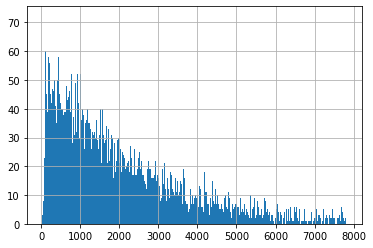

In [17]:
# Find problematic data in `days_employed`, if they exist, and calculate the percentage

# We should remove our data above 7815 days. This is the Q3 * 2.5
data = data.loc[data['days_employed'] < 7815]
data['days_employed'].hist(bins=1000)
data['days_employed'].describe()

In [20]:
# Check the `dob_years` for suspicious values and count the percentage
data['dob_years'].describe()
# dob_years there should be no minimum of 0, at least 18
data = data.loc[data['dob_years'] > 18]
data['dob_years'].describe()


count    15156.000000
mean        39.561428
std         10.214117
min         19.000000
25%         31.000000
50%         39.000000
75%         47.000000
max         75.000000
Name: dob_years, dtype: float64

In [21]:
# Address the issues in the `dob_years` column, if they exist
data['dob_years'].sort_values().unique()
# There is no other problems in the dob years column

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75])

In [22]:
# Let's see the values for the column
data['family_status'].sort_values().unique()
# I don't see any problems with the data

array(['civil partnership', 'divorced', 'married', 'unmarried',
       'widow / widower'], dtype=object)

In [23]:
# Let's see the values in the column
data['gender'].describe()
# There are 3 unique values
data['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [25]:
# Let's see the values in the column
data['income_type'].describe()
data['income_type'].unique()

array(['employee', 'business', 'civil servant', 'student', 'entrepreneur',
       'paternity / maternity leave'], dtype=object)

In [27]:
# Checking duplicates
data.duplicated().sum()


0

In [28]:
# Check the size of the dataset that you now have after your first manipulations with it
len(data)
# 21525 => 14828 so a decrease of 31% of data points

15156

In [29]:
# Most of the extreme outliers have been removed, as well as data that didnt make sense.
# Like people working more days then the human lifespan. 
# People's ages being younger then an age for a credit check.

# Working with missing values

### Restoring missing values in `total_income`

In [31]:
# Let's write a function that calculates the age category
data['age'] = data['dob_years']
data['total_income'].mean()
data['total_income'].replace(to_replace= 0, value= data['total_income'].mean())
# We replaced all zero values in total_income to the mean for the column. This is because there is not to big of a spread,
# in distrubtion. If it was wider, I would have used median.

1        17932.802
2        23341.752
3        42820.568
5        40922.170
6        38484.156
           ...    
21519    18551.846
21520    35966.698
21522    14347.610
21523    39054.888
21524    13127.587
Name: total_income, Length: 15156, dtype: float64

In [32]:
# Test if the function works
data['age'].head(10)

1     36
2     33
3     32
5     27
6     43
7     50
8     35
9     41
10    36
11    40
Name: age, dtype: int64

27882.398210543673

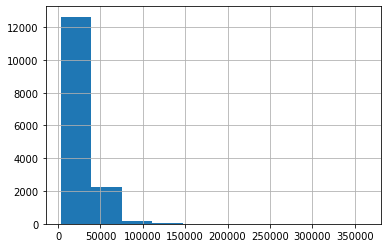

In [36]:
# Look at the mean values for income based on your identified factors
data['total_income'].hist()
data['total_income'].mean()

In [37]:
# Look at the median values for income based on your identified factors
data['total_income'].median()
# The data is not spread out very much, it is consolidated in the 0 - 50000 range.
# I think the mean would be best because of the high volume of data in that range.

24224.872499999998

In [39]:
# Checking the number of entries in the columns
len(data['total_income'])
len(data['age'])
# Matches all other columns


15156

###  Restoring values in `days_employed`

<AxesSubplot:>

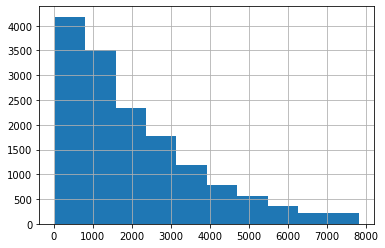

In [40]:
# Distribution of `days_employed` medians based on your identified parameters
data['days_employed'].describe()
data['days_employed'].hist()



In [41]:
# Let's write a function that calculates means or medians (depending on your decision) based on your identified parameter
# since there is a portion of the data that is grouped on the low end I think a mean should work best.

In [42]:
# Check that the function works
data['days_employed'].median()


1556.5265993694752

With the spread of data being more distributed. I believe that the median would be a better measurement of the data.

In [44]:
# Apply function to the income_type
data['days_employed'].replace(to_replace= 0, value= 1556.5265993694752)


1        4024.803754
2        5623.422610
3        4124.747207
5         926.185831
6        2879.202052
            ...     
21519    2351.431934
21520    4529.316663
21522    2113.346888
21523    3112.481705
21524    1984.507589
Name: days_employed, Length: 15156, dtype: float64

<AxesSubplot:>

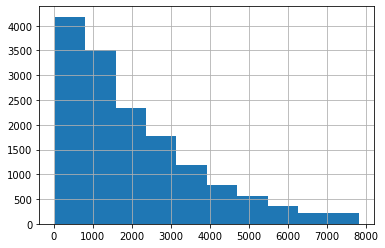

In [45]:
# Check if function worked

data['days_employed'].hist()

In [46]:
# Replacing missing values

print(data['total_income'].max())

362496.645


In [47]:
# Check the entries in all columns - make sure we fixed all missing values
# Looks good to me
len(data['total_income'])

15156

## Categorization of data

[To answer the questions and test the hypotheses, you will want to work with categorized data. Look at the questions that were posed to you and that you should answer. Think about which of the data will need to be categorized to answer these questions. Below you will find a template through which you can work your way when categorizing data. The first step-by-step processing covers the text data; the second one addresses the numerical data that needs to be categorized. You can use both or none of the suggested instructions - it's up to you.]

[Despite of how you decide to address the categorization, make sure to provide clear explanation of why you made your decision. Remember: this is your work and you make all decisions in it.]


In [48]:
# Print the values for your selected data for categorization
# I decided to categorize total_income into 5 distinct categories.
# Each of the distinct categories are at 25%, 50%, 75% and max 
def categorization_of_income(income):
    if income <= 17374:
        return 'low'
    elif income <= 24224 and income > 17374:
        return 'medium'
    elif income <= 33872 and income > 24224:
        return 'high'
    elif income > 33872:
        return 'exceptionally high'

In [49]:
data['categorized_income'] = data['total_income'].apply(categorization_of_income)

In [50]:
data['categorized_income'].describe()


count                  15156
unique                     4
top       exceptionally high
freq                    3790
Name: categorized_income, dtype: object

In [51]:

cat_incomedebt_crosstab = pd.crosstab(
    index= data['debt'], columns = data['categorized_income']
)
print(cat_incomedebt_crosstab)
# low and 0.10
# medium and 0.105
# high and 0.101
# ehigh and 0.07

categorized_income  exceptionally high  high   low  medium
debt                                                      
0                                 3510  3440  3432    3425
1                                  280   349   357     363


In [52]:
# Count each categories values to see the distribution
data['categorized_income'].describe()

count                  15156
unique                     4
top       exceptionally high
freq                    3790
Name: categorized_income, dtype: object

In [53]:
def categorization_of_purpose(purpose):
    if 'car' in purpose:
        return 'car-related'
    elif 'property' in purpose:
        return 'property-related'
    elif 'education' in purpose:
        return 'education-related'
    elif 'estate' in purpose:
        return 'estate-related'
    elif 'housing' in purpose:
        return 'property-related'
    elif 'university' in purpose:
        return 'education-related'
    elif 'wedding' in purpose:
        return 'wedding-related'
    elif 'house' in purpose:
        return 'property-related'
data['categorized_purpose'] = data['purpose'].apply(categorization_of_purpose)

In [54]:
data['purpose'].unique()

array(['car purchase', 'purchase of the house', 'supplementary education',
       'housing transactions', 'education', 'having a wedding',
       'purchase of the house for my family', 'buy real estate',
       'buy commercial real estate', 'buy residential real estate',
       'construction of own property', 'property', 'building a property',
       'buying a second-hand car', 'to have a wedding', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'getting an education', 'buying my own car',
       'second-hand car purchase', 'car', 'wedding ceremony',
       'to get a supplementary education', 'purchase of my own house',
       'real estate transactions',
       'transactions with commercial real estate', 'to own a car',
       'purchase of a car', 'profile education', 'university education',
       'to buy a car', 'buying property for renting out',
       'building a real estate', 'housing renovation',
       'getting higher education', 'going

## Checking the Hypotheses


**Is there a correlation between having children and paying back on time?**

In [55]:
# Check the children data and paying back on time
childrendebt_crosstab = pd.crosstab(
    index= data['debt'], columns = data['children']
)
# Calculating default-rate based on the number of children

print(childrendebt_crosstab)
# I am gonna record the percentages of debt/children here
# children=0 debt ratio= 0.09
# children=1 debt ratio= 0.107
# children=2 debt ratio= 0.107
# children=3 debt ratio= 0.078
# children=4 debt ratio= 0.1
# children=5 debt ratio= 0
data.corr()
# children and debt have a very small positive correlation

children     0     1     2    3   4  5
debt                                  
0         8257  3623  1623  266  30  8
1          762   388   175   21   3  0


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,age
children,1.000000,-0.005044,-0.220890,-0.006444,-0.186916,0.012810,-0.005687,-0.220890
days_employed,-0.005044,1.000000,0.247937,-0.025912,-0.086357,-0.065240,0.051811,0.247937
dob_years,-0.220890,0.247937,1.000000,0.014388,-0.108276,-0.052118,0.049128,1.000000
education_id,-0.006444,-0.025912,0.014388,1.000000,0.015012,0.066279,-0.171763,0.014388
family_status_id,-0.186916,-0.086357,-0.108276,0.015012,1.000000,0.025691,-0.012766,-0.108276
debt,0.012810,-0.065240,-0.052118,0.066279,0.025691,1.000000,-0.022205,-0.052118
total_income,-0.005687,0.051811,0.049128,-0.171763,-0.012766,-0.022205,1.000000,0.049128
age,-0.220890,0.247937,1.000000,0.014388,-0.108276,-0.052118,0.049128,1.000000


**Is there a correlation between family status and paying back on time?**

In [56]:
# Check the family status data and paying back on time
# There is a very small correlation between family status and debt
data.groupby('family_status_id')['debt'].agg(Count='count', Sum='sum', Mean = 'mean')
# Calculating default-rate based on family status
# 0 and 0.089
# 1 and 0.111
# 2 and 0.07
# 3 and 0.08
# 4 and 0.12

,Count,Sum,Mean
family_status_id,,,
0,8817,727,0.082454
1,3010,301,0.100000
2,350,23,0.065714
3,836,62,0.074163
4,2143,236,0.110126


**Is there a correlation between income level and paying back on time?**

In [57]:
# Check the income level data and paying back on time
cat_incomedebt_crosstab = pd.crosstab(
    index= data['debt'], columns = data['categorized_income']
)
print(cat_incomedebt_crosstab)
# low and 0.10
# medium and 0.105
# high and 0.101
# ehigh and 0.07


# Calculating default-rate based on income level
# There is a small correlation with increased income level and a lower chance of debt


categorized_income  exceptionally high  high   low  medium
debt                                                      
0                                 3510  3440  3432    3425
1                                  280   349   357     363


**How does credit purpose affect the default rate?**

In [58]:
# Check the percentages for default rate for each credit purpose and analyze them
creditdebt_crosstab = pd.crosstab(
    index= data['categorized_purpose'], columns = data['debt']
)
print(creditdebt_crosstab)
creditdebt_crosstab.reset_index()
creditdebt_crosstab['new_col'] = creditdebt_crosstab[1]/creditdebt_crosstab[0]
# Percentages are stored in creditdebt_crosstab['new_col']
print(creditdebt_crosstab['new_col'])

debt                    0    1
categorized_purpose           
car-related          2715  311
education-related    2280  254
estate-related       2877  274
property-related     4181  350
wedding-related      1499  132
categorized_purpose
car-related          0.114549
education-related    0.111404
estate-related       0.095238
property-related     0.083712
wedding-related      0.088059
Name: new_col, dtype: float64


# General Conclusion 

[We replaced missing values with the mean or median of the column based on our intuition and the distirbuiton of the data. After completing that task we then categorized the data within the dataset to allow analysis to happen in a much easier way. We discovered that after categorizing the data that people who financed a new car/ a second hand car had the highest probablilty to have debt.I recommened not approving loans on cars without further information.]

[List your conclusions regarding the posed questions here as well.]
